In [ ]:
import pandas as pd
#Importing Data
bds_train_data = pd.read_csv('train_final.csv')
bds_test_data = pd.read_csv('test_final.csv')

In [ ]:
#Preprocessing Data
bds_train_data
X_train = bds_train_data.drop(['Id','Y'], axis=1)
X_test = bds_test_data.drop(['Id'], axis=1)
y = bds_train_data.Y
y.shape

(16383,)

In [ ]:
all_data = pd.concat((bds_train_data.loc[:,'f1':'f24'], bds_test_data.loc[:,'f1':'f24']))
all_data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,25884,1,33.63,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,1945,118450,119184,1,121372,1,1,1,2,1
1,34346,1,10.62,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,15385,117945,292795,1,259173,1,1,1,1,1
2,34923,1,1.77,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,7547,118933,290919,1,118784,1,1,1,1,1
3,80926,1,30.09,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,4933,118458,118331,1,307024,1,1,1,2,1
4,4674,1,1.77,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,13836,142145,4673,1,128230,1,1,1,620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,971,1,1.77,118300,1,0,117961,310997,1,0,1,1,120346,1.000000,4864,123055,118424,1,120344,1,1,1,44,1
16381,105802,1,1.77,118327,1,0,117961,117906,1,0,1,1,118322,0.580688,32457,118320,290919,1,118321,1,1,1,4,1
16382,43096,1,3.54,117962,1,0,117961,118368,1,0,1,1,118486,1.000000,2014,117904,117887,1,118368,1,1,1,1,1
16383,31220,1,1.77,118386,1,0,117961,117906,1,1,1,1,118322,-2.374507,1249,118910,290919,1,118321,1,1,1,2,2


In [ ]:
#Day 1 - Just Testing Logistic Regression, Random Forest, and XGBoost without hyperparameter tuning
#Logistic Regression without any Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver='liblinear', C=10.0, random_state=42)
lr.fit(X_train, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)
p_pred = lr.predict_proba(X_test)
p_pred[:,1][:100]

array([0.93976097, 0.94012016, 0.9552594 , 0.93980405, 0.94155961,
       0.93978706, 0.94090758, 0.93983224, 0.94335537, 0.9387291 ,
       0.93764473, 0.94116666, 0.94270927, 0.9562577 , 0.93961306,
       0.93908251, 0.94126289, 0.95690809, 0.94335119, 0.9477501 ,
       0.94337111, 0.94648553, 0.9423438 , 0.95507025, 0.94147916,
       0.96951642, 0.9422196 , 0.94164021, 0.93736275, 0.9391091 ,
       0.94354256, 0.94673522, 0.93891785, 0.94161971, 0.94464931,
       0.94055398, 0.94300491, 0.93988939, 0.97989885, 0.93909155,
       0.94421395, 0.94385863, 0.94773231, 0.94506979, 0.94038877,
       0.94366745, 0.93968478, 0.94479256, 0.94126939, 0.93902339,
       0.93874021, 0.97260189, 0.94409036, 0.94111243, 0.93942639,
       0.94518924, 0.93956332, 0.93937633, 0.94057317, 0.94230276,
       0.94029699, 0.94301108, 0.94023018, 0.94838677, 0.94271105,
       0.94048989, 0.9450492 , 0.9483739 , 0.94299588, 0.94006099,
       0.94721446, 0.93928789, 0.94557469, 0.93998025, 0.94560

In [ ]:
#Random Forrest without any Hyperparameter Tuning

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y)
p_pred2 = rf.predict_proba(X_test)
p_pred2[:,1][:200]

array([0.913, 0.665, 0.985, 0.963, 0.986, 0.994, 0.917, 0.864, 0.99 ,
       0.994, 0.971, 0.979, 0.89 , 0.954, 0.94 , 1.   , 0.982, 0.991,
       0.985, 0.947, 0.968, 0.958, 0.957, 0.882, 0.963, 0.964, 0.957,
       0.894, 0.917, 0.867, 0.979, 0.893, 0.997, 0.936, 0.983, 0.98 ,
       0.989, 0.885, 0.957, 0.968, 0.996, 0.906, 0.993, 0.998, 0.967,
       0.947, 0.918, 0.97 , 0.993, 0.991, 0.946, 0.993, 0.997, 0.962,
       0.939, 0.993, 0.878, 0.986, 0.999, 0.989, 0.482, 0.975, 0.977,
       0.995, 0.944, 0.819, 0.92 , 0.981, 0.943, 0.894, 0.93 , 0.872,
       0.933, 0.99 , 0.942, 0.974, 0.993, 0.997, 0.774, 0.988, 0.991,
       0.993, 0.84 , 0.88 , 0.868, 0.923, 0.996, 0.969, 0.985, 0.93 ,
       0.893, 0.982, 0.908, 0.974, 0.966, 0.995, 0.988, 0.926, 0.985,
       0.953, 0.932, 0.947, 0.975, 0.982, 0.453, 0.983, 0.978, 0.997,
       0.911, 0.994, 0.974, 0.987, 0.996, 0.933, 0.988, 0.992, 0.953,
       0.878, 0.93 , 0.966, 0.973, 0.991, 0.864, 0.957, 0.808, 0.913,
       0.525, 0.898,

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000,random_state=42)
xgb.fit(X_train, y)
y_pred3 = xgb.predict(X_test)
p_pred3 = xgb.predict_proba(X_test)
p_pred3[:,1][:200]

array([0.88799083, 0.9046939 , 0.99994564, 0.99958104, 0.9852486 ,
       0.9996737 , 0.9169462 , 0.95228815, 0.9984769 , 0.9997588 ,
       0.99858224, 0.9791479 , 0.99750584, 0.99451834, 0.96285266,
       0.99969363, 0.99693656, 0.99790287, 0.9825075 , 0.98694813,
       0.872648  , 0.97946894, 0.9490589 , 0.8929232 , 0.99817145,
       0.99727875, 0.92173296, 0.86280555, 0.9969229 , 0.9729696 ,
       0.9935679 , 0.9725042 , 0.99147403, 0.98736703, 0.99883527,
       0.9967964 , 0.99959415, 0.7527527 , 0.9997396 , 0.9954631 ,
       0.9998468 , 0.99909294, 0.9986557 , 0.9998148 , 0.99809664,
       0.99627197, 0.97793293, 0.99412787, 0.9989912 , 0.998632  ,
       0.99736065, 0.99486625, 0.9995641 , 0.9391402 , 0.9398574 ,
       0.9988951 , 0.933013  , 0.99664223, 0.999941  , 0.9997787 ,
       0.03054796, 0.9934034 , 0.9792889 , 0.9715152 , 0.99913424,
       0.9638138 , 0.96865195, 0.9959565 , 0.9720863 , 0.99132514,
       0.9921886 , 0.9670785 , 0.9905291 , 0.9987087 , 0.94824

In [ ]:
#Day 2 - Looking into Feautre Engineering

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)


In [ ]:
all_data_scaled = ss.fit_transform(all_data)

In [ ]:
all_data_scaled

array([[-4.98600647e-01, -1.59979712e-01,  8.07932443e-02, ...,
        -1.71613027e-01, -9.66323581e-03, -1.61527913e-01],
       [-2.50984585e-01, -1.59979712e-01, -2.77106520e-03, ...,
        -1.71613027e-01, -9.66366949e-03, -1.61527913e-01],
       [-2.34100342e-01, -1.59979712e-01, -3.49111842e-02, ...,
        -1.71613027e-01, -9.66366949e-03, -1.61527913e-01],
       ...,
       [ 5.05896676e-03, -1.59979712e-01, -2.84831604e-02, ...,
        -1.71613027e-01, -9.66366949e-03, -1.61527913e-01],
       [-3.42457973e-01, -1.59979712e-01, -3.49111842e-02, ...,
        -1.71613027e-01, -9.66323581e-03,  3.57907043e+00],
       [-3.74881561e-02, -1.59979712e-01, -2.84831604e-02, ...,
        -1.71613027e-01, -9.66366949e-03, -1.61527913e-01]])

In [ ]:
#Removing Columns Based on Feature Importance/Genie Impurity
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc.fit(X_train_scaled, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Text(0.5, 1.0, 'Feature Importance')

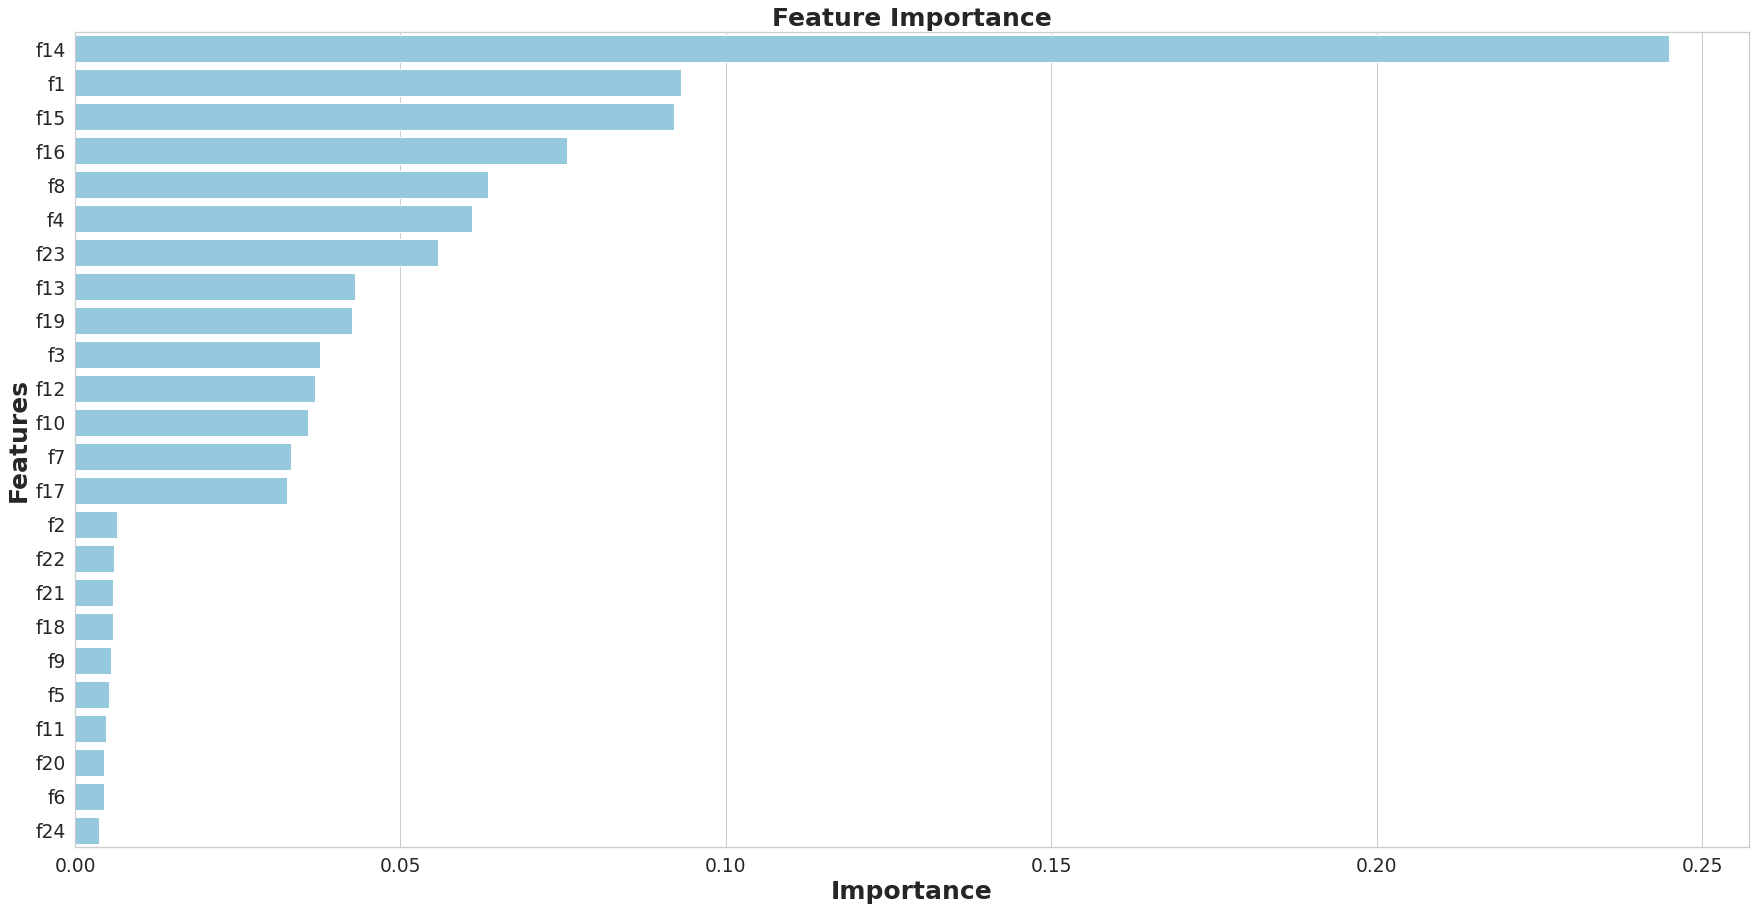

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feats = {}
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

In [ ]:
dropFeat= list(importances[14:]['Features'])
dropFeat

['f2', 'f22', 'f21', 'f18', 'f9', 'f5', 'f11', 'f20', 'f6', 'f24']

In [ ]:
train_dropfea = bds_train_data.drop(['Id','Y'], axis=1)
train_dropfea = train_dropfea.drop(dropFeat, axis=1)
train_dropfea
train_dropfea_scaled = ss.fit_transform(train_dropfea)
train_dropfea_scaled

array([[-5.09482175e-01,  6.18927721e-02,  6.02973119e-02, ...,
        -6.50556814e-01, -1.47559004e-01, -1.02727270e-02],
       [-2.57713044e-01, -3.25881845e-03, -6.25467781e-02, ...,
         1.07540896e+00,  4.28471015e+00, -1.02730409e-02],
       [-2.40545615e-01, -2.83171225e-02,  7.56662845e-04, ...,
         1.05675858e+00, -2.30800146e-01, -1.02730409e-02],
       ...,
       [-4.35843721e-01, -2.33054617e-02,  7.56662845e-04, ...,
         8.53642378e-01,  2.16540580e-01, -1.02730409e-02],
       [-1.05521006e+00, -2.33054617e-02,  4.29811409e-03, ...,
         1.05675858e+00, -2.30800146e-01, -1.02695871e-02],
       [-8.66725374e-01, -2.83171225e-02, -2.29267923e-02, ...,
        -1.63937512e+00, -2.59908814e-01, -1.02727270e-02]])

In [ ]:
test_dropfea = bds_test_data.drop(['Id'], axis=1)
test_dropfea = test_dropfea.drop(dropFeat, axis=1)
test_dropfea
test_dropfea_scaled = ss.fit_transform(test_dropfea)
test_dropfea_scaled

array([[-1.47012233e-01, -5.62313339e-02,  7.04338857e-02, ...,
        -6.46476065e-01, -2.57826830e-01, -1.69032943e-02],
       [ 7.75423963e+00, -4.54424348e-02, -4.97431970e-02, ...,
         1.07734466e+00, -2.43754296e-01, -1.68947357e-02],
       [-5.17000080e-01,  7.32354554e-02,  4.34739554e-03, ...,
        -1.77436362e+00,  7.60730788e-02, -1.68847507e-02],
       ...,
       [ 7.41572418e-03, -4.54424348e-02, -6.93728476e-02, ...,
        -6.46476065e-01, -2.42237303e-01, -1.69032943e-02],
       [-3.34554520e-01, -5.62313339e-02,  2.31046172e-02, ...,
         1.07734466e+00, -2.43754296e-01, -1.69018679e-02],
       [-3.44523067e-02, -4.54424348e-02, -4.97431970e-02, ...,
         1.07734466e+00, -2.57181301e-01, -1.69032943e-02]])

In [ ]:
#Day 3 Hyperparameter Tuning & Stacking

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.2MB 53kB/s 


In [ ]:
#Tuning with Full Data Set

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [3, 4, 5,6],
         'l2_leaf_reg': [1,4,9],
         'iterations': [1000]}
cb = CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(X_train, y)

cb_model.best_score_, cb_model.best_params_

Streaming output truncated to the last 5000 lines.
1:	learn: 0.6237200	total: 19.1ms	remaining: 9.52s
2:	learn: 0.5926465	total: 34.3ms	remaining: 11.4s
3:	learn: 0.5615225	total: 52.9ms	remaining: 13.2s
4:	learn: 0.5313759	total: 65.4ms	remaining: 13s
5:	learn: 0.5075132	total: 74.8ms	remaining: 12.4s
6:	learn: 0.4852485	total: 84.5ms	remaining: 12s
7:	learn: 0.4650672	total: 94.3ms	remaining: 11.7s
8:	learn: 0.4463527	total: 105ms	remaining: 11.5s
9:	learn: 0.4289620	total: 115ms	remaining: 11.3s
10:	learn: 0.4131943	total: 123ms	remaining: 11.1s
11:	learn: 0.3981656	total: 133ms	remaining: 11s
12:	learn: 0.3846804	total: 142ms	remaining: 10.8s
13:	learn: 0.3668384	total: 151ms	remaining: 10.6s
14:	learn: 0.3540522	total: 161ms	remaining: 10.6s
15:	learn: 0.3425789	total: 170ms	remaining: 10.4s
16:	learn: 0.3330377	total: 179ms	remaining: 10.3s
17:	learn: 0.3242934	total: 187ms	remaining: 10.2s
18:	learn: 0.3161164	total: 196ms	remaining: 10.1s
19:	learn: 0.3084969	total: 206ms	remai

(0.8557765722322684, {'iterations': 1000, 'l2_leaf_reg': 1, 'max_depth': 6})

In [ ]:
cb_model_tune = CatBoostClassifier(max_depth=6, iterations=1000, l2_leaf_reg=1)
cb_model_tune.fit(X_train, y)
p_pred12 = cb_model_tune.predict_proba(X_test)
p_pred12[:,1][:100]

0:	learn: 0.6567721	total: 15.8ms	remaining: 15.7s
1:	learn: 0.6231756	total: 33.1ms	remaining: 16.5s
2:	learn: 0.5923013	total: 47.9ms	remaining: 15.9s
3:	learn: 0.5635979	total: 62.1ms	remaining: 15.5s
4:	learn: 0.5370563	total: 75.5ms	remaining: 15s
5:	learn: 0.5126033	total: 89.4ms	remaining: 14.8s
6:	learn: 0.4860476	total: 105ms	remaining: 14.9s
7:	learn: 0.4654773	total: 125ms	remaining: 15.5s
8:	learn: 0.4470310	total: 137ms	remaining: 15.1s
9:	learn: 0.4268303	total: 152ms	remaining: 15s
10:	learn: 0.4111349	total: 165ms	remaining: 14.9s
11:	learn: 0.3945803	total: 182ms	remaining: 15s
12:	learn: 0.3813275	total: 196ms	remaining: 14.9s
13:	learn: 0.3691542	total: 214ms	remaining: 15.1s
14:	learn: 0.3578565	total: 233ms	remaining: 15.3s
15:	learn: 0.3474804	total: 246ms	remaining: 15.1s
16:	learn: 0.3339729	total: 260ms	remaining: 15.1s
17:	learn: 0.3251477	total: 274ms	remaining: 15s
18:	learn: 0.3169602	total: 287ms	remaining: 14.8s
19:	learn: 0.3094658	total: 301ms	remaining

array([0.93020779, 0.79156692, 0.99850066, 0.99616543, 0.97088641,
       0.99674693, 0.91261936, 0.98691074, 0.99864862, 0.9978081 ,
       0.99380533, 0.97326667, 0.99426671, 0.9856231 , 0.94936278,
       0.99800561, 0.98759105, 0.99494152, 0.97882527, 0.97914585,
       0.9557977 , 0.95735149, 0.95720245, 0.95818876, 0.99794774,
       0.96684464, 0.93804091, 0.94104906, 0.99582048, 0.93356607,
       0.97840804, 0.93074358, 0.97560161, 0.95930419, 0.98960005,
       0.99629861, 0.99733541, 0.86682836, 0.99759261, 0.97435329,
       0.99847177, 0.99911213, 0.99594294, 0.99710762, 0.98703202,
       0.99109385, 0.96094475, 0.9773323 , 0.99821363, 0.99633952,
       0.96646153, 0.99463171, 0.99758995, 0.98004352, 0.91263346,
       0.99692722, 0.93097377, 0.98861829, 0.9989048 , 0.9986314 ,
       0.02780331, 0.96635447, 0.95718597, 0.94454639, 0.9797406 ,
       0.94882008, 0.97692903, 0.98293976, 0.93649097, 0.97234696,
       0.97307317, 0.97055604, 0.98932767, 0.99639389, 0.95909

In [ ]:
XGBmodel = XGBClassifier()
param_dist = {"max_depth": [4,5,6],
              "min_child_weight" : [1],
              "n_estimators": [1000],
              "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
              }
grid_search = GridSearchCV(XGBmodel, param_grid=param_dist, scoring="roc_auc", cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y)

grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 13.9min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
grid_search.best_score_, grid_search.best_params_

(0.8753082547063431,
 {'gamma': 0.001, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 1000})

In [ ]:
XGBmodel_tune = XGBClassifier(max_depth=5, learning_rate =0.1,  min_child_weight=1, gamma = 0.001, n_estimators=1000)
XGBmodel_tune.fit(X_train, y)
p_pred15 = XGBmodel_tune.predict_proba(X_test)
p_pred15[:,1][:100]

array([0.93465185, 0.99437296, 0.9999976 , 0.9999925 , 0.99792165,
       0.999876  , 0.83995146, 0.9972178 , 0.99991155, 0.99995315,
       0.9994242 , 0.9951309 , 0.99743384, 0.998218  , 0.98694915,
       0.99989974, 0.99944645, 0.9997305 , 0.9973929 , 0.998114  ,
       0.963804  , 0.99012065, 0.99422425, 0.96918094, 0.9999654 ,
       0.99791425, 0.9763258 , 0.91691995, 0.9997098 , 0.98891735,
       0.9993119 , 0.9932326 , 0.9983621 , 0.99943966, 0.9999002 ,
       0.9966497 , 0.999954  , 0.8440073 , 0.99993074, 0.9973822 ,
       0.99999094, 0.9999467 , 0.9998759 , 0.9999529 , 0.9997025 ,
       0.9999126 , 0.99410063, 0.99839157, 0.99989676, 0.99956244,
       0.99931955, 0.9996836 , 0.99992573, 0.9940154 , 0.98103195,
       0.9999542 , 0.9789761 , 0.998982  , 0.9999814 , 0.999974  ,
       0.0156537 , 0.99918526, 0.99044585, 0.9902021 , 0.99964404,
       0.99260193, 0.973959  , 0.99888974, 0.9875965 , 0.99826366,
       0.99640477, 0.99012744, 0.99962234, 0.9998617 , 0.97894

In [ ]:
randFor3 = RandomForestClassifier()

param_grid4 = {

    "n_estimators": [1000],
    "max_depth": [3,4,5,6], 
    "min_samples_split": [0.01, 0.05, 0.1, 0.2]
    
}
# Instantiate the grid search model
grid_search5 = GridSearchCV(estimator = randFor3, param_grid = param_grid4, scoring="roc_auc",
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search5.fit(X_train, y)

grid_search5.best_score_, grid_search5.best_params_


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.1min finished


(0.8047278706539881,
 {'max_depth': 6, 'min_samples_split': 0.01, 'n_estimators': 1000})

In [ ]:
randFor_tune3 = RandomForestClassifier(n_estimators=1000, max_depth=6, min_samples_split=0.01)
randFor_tune3.fit(X_train, y)
p_pred60 = randFor_tune3.predict_proba(X_test)
p_pred60[:,1][:100]

array([0.94677925, 0.87235869, 0.96392789, 0.95463368, 0.94618014,
       0.96827674, 0.89859985, 0.9038038 , 0.97333224, 0.97209769,
       0.93517828, 0.93565822, 0.9669012 , 0.95451547, 0.95240317,
       0.97212581, 0.95581188, 0.96625321, 0.96854017, 0.92669303,
       0.96557944, 0.95480904, 0.93340516, 0.9218129 , 0.92445598,
       0.942221  , 0.93202567, 0.90496017, 0.9248988 , 0.90846259,
       0.95171418, 0.92469429, 0.94711248, 0.92026602, 0.94667523,
       0.96824602, 0.96907248, 0.89790551, 0.96735026, 0.92272874,
       0.97142495, 0.93432588, 0.96982414, 0.97161443, 0.9736625 ,
       0.95121238, 0.93211583, 0.95435165, 0.96992537, 0.96495185,
       0.93441486, 0.9661883 , 0.96874592, 0.95497626, 0.91069901,
       0.97249695, 0.92319878, 0.950673  , 0.97796904, 0.97233676,
       0.76532296, 0.95134495, 0.95876209, 0.94803641, 0.93411468,
       0.83619708, 0.96488424, 0.94877591, 0.932372  , 0.8956405 ,
       0.92408722, 0.92241384, 0.9396882 , 0.97094673, 0.93608

In [ ]:
#With Removed Features
from catboost import CatBoostClassifier

params2 = {'depth': [4, 7, 10],
          #'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'n_estimators': [1000]}
cb2 = CatBoostClassifier()
cb_model2 = GridSearchCV(cb2, params2, scoring="roc_auc", cv = 3)
cb_model2.fit(train_dropfea, y)
cb_model2.best_params_


Streaming output truncated to the last 5000 lines.
1:	learn: 0.6222886	total: 102ms	remaining: 51s
2:	learn: 0.5853228	total: 164ms	remaining: 54.4s
3:	learn: 0.5572843	total: 214ms	remaining: 53.3s
4:	learn: 0.5313683	total: 271ms	remaining: 53.9s
5:	learn: 0.5069883	total: 328ms	remaining: 54.3s
6:	learn: 0.4845365	total: 381ms	remaining: 54s
7:	learn: 0.4606940	total: 435ms	remaining: 54s
8:	learn: 0.4402960	total: 492ms	remaining: 54.2s
9:	learn: 0.4215332	total: 550ms	remaining: 54.4s
10:	learn: 0.4040601	total: 601ms	remaining: 54s
11:	learn: 0.3892149	total: 650ms	remaining: 53.5s
12:	learn: 0.3760409	total: 677ms	remaining: 51.4s
13:	learn: 0.3634221	total: 747ms	remaining: 52.6s
14:	learn: 0.3514724	total: 798ms	remaining: 52.4s
15:	learn: 0.3405287	total: 849ms	remaining: 52.2s
16:	learn: 0.3266132	total: 900ms	remaining: 52s
17:	learn: 0.3176736	total: 952ms	remaining: 51.9s
18:	learn: 0.3064642	total: 1.01s	remaining: 52.3s
19:	learn: 0.2972178	total: 1.06s	remaining: 52.2s

{'depth': 10, 'l2_leaf_reg': 9, 'n_estimators': 1000}

In [ ]:
cb_model_tune2 = CatBoostClassifier(depth=10, n_estimators=1000, l2_leaf_reg=9)
cb_model_tune2.fit(train_dropfea, y)
p_pred20 = cb_model_tune2.predict_proba(test_dropfea)
p_pred20[:,1][:100]

0:	learn: 0.6539348	total: 55.5ms	remaining: 55.4s
1:	learn: 0.6202378	total: 113ms	remaining: 56.2s
2:	learn: 0.5844232	total: 169ms	remaining: 56.3s
3:	learn: 0.5565520	total: 227ms	remaining: 56.6s
4:	learn: 0.5308026	total: 287ms	remaining: 57.2s
5:	learn: 0.5067220	total: 352ms	remaining: 58.2s
6:	learn: 0.4848297	total: 408ms	remaining: 57.9s
7:	learn: 0.4592930	total: 464ms	remaining: 57.6s
8:	learn: 0.4392690	total: 528ms	remaining: 58.2s
9:	learn: 0.4207177	total: 586ms	remaining: 58s
10:	learn: 0.4034345	total: 640ms	remaining: 57.6s
11:	learn: 0.3890822	total: 695ms	remaining: 57.2s
12:	learn: 0.3758448	total: 756ms	remaining: 57.4s
13:	learn: 0.3590116	total: 812ms	remaining: 57.2s
14:	learn: 0.3432634	total: 866ms	remaining: 56.9s
15:	learn: 0.3330916	total: 922ms	remaining: 56.7s
16:	learn: 0.3201678	total: 981ms	remaining: 56.7s
17:	learn: 0.3113255	total: 1.04s	remaining: 56.5s
18:	learn: 0.3009642	total: 1.09s	remaining: 56.3s
19:	learn: 0.2904452	total: 1.15s	remainin

array([0.93307898, 0.86613281, 0.99912137, 0.99718405, 0.98069195,
       0.99814603, 0.94507047, 0.97477448, 0.99910901, 0.99936365,
       0.99460434, 0.98391094, 0.99142212, 0.98093469, 0.97703665,
       0.99940242, 0.9880721 , 0.9983292 , 0.99786446, 0.98511307,
       0.97524595, 0.97068002, 0.98023937, 0.98577531, 0.99770367,
       0.9833868 , 0.96629554, 0.89944751, 0.99395447, 0.93036115,
       0.98596514, 0.95971472, 0.99492015, 0.98729413, 0.99425478,
       0.99671754, 0.99913019, 0.83899634, 0.99843467, 0.98764916,
       0.99920129, 0.99578646, 0.99902767, 0.99890912, 0.99119604,
       0.99233431, 0.94052671, 0.99242147, 0.99840107, 0.99796632,
       0.98803428, 0.99372501, 0.99855076, 0.98021028, 0.92854122,
       0.99858834, 0.93199521, 0.99430514, 0.99938321, 0.99937955,
       0.04475543, 0.98460652, 0.95557526, 0.9708491 , 0.99184606,
       0.97542363, 0.93814139, 0.9898411 , 0.97536439, 0.98975041,
       0.98484067, 0.99047664, 0.98895166, 0.9973445 , 0.97765

In [ ]:
#With Removed Features
XGBmodel3 = XGBClassifier()
param_dist3 = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [1000]#,
              #"learning_rate": [0.05, 0.1,0.16]
              }
grid_search3 = GridSearchCV(XGBmodel3, param_grid=param_dist3, scoring="roc_auc", cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search3.fit(train_dropfea, y)

grid_search3.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  7.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  7.4min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
XGBmodel_tune2 = XGBClassifier(max_depth=10, min_child_weight=3, n_estimators=1000)
XGBmodel_tune2.fit(train_dropfea, y)
p_pred30 = XGBmodel_tune.predict_proba(X_test)
p_pred30[:,1][:100]

array([0.8927044 , 0.992192  , 0.9999951 , 0.9999937 , 0.9972045 ,
       0.99988496, 0.8704402 , 0.9934336 , 0.99986076, 0.99991333,
       0.9993587 , 0.9947431 , 0.9977811 , 0.99815804, 0.98725545,
       0.9999082 , 0.9997085 , 0.9994615 , 0.9973494 , 0.9953419 ,
       0.9614659 , 0.9907419 , 0.9942245 , 0.9770996 , 0.99992955,
       0.9988049 , 0.9696138 , 0.87958753, 0.99968565, 0.9911225 ,
       0.9990451 , 0.9910936 , 0.9985857 , 0.9993223 , 0.99995327,
       0.99745184, 0.9999436 , 0.7977443 , 0.9999634 , 0.9967393 ,
       0.9999852 , 0.99994075, 0.99981886, 0.9999491 , 0.9997762 ,
       0.99979514, 0.9960698 , 0.9993799 , 0.9998915 , 0.9997725 ,
       0.9994778 , 0.99968827, 0.99992955, 0.9938974 , 0.9891817 ,
       0.9999336 , 0.9757874 , 0.9992939 , 0.9999665 , 0.99996674,
       0.00940894, 0.99910283, 0.98996174, 0.9951859 , 0.99987495,
       0.9960175 , 0.9760415 , 0.9992046 , 0.99238694, 0.9973001 ,
       0.9965305 , 0.9956079 , 0.99974984, 0.99972564, 0.99355

In [ ]:
#With Removed Features
param_grid3 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000]
}



In [ ]:
# Create a based model
randFor2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search4 = GridSearchCV(estimator = randFor2, param_grid = param_grid3, scoring="roc_auc",
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search4.fit(train_dropfea, y)
grid_search4.best_params_


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 37.1min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
randFor_tune2 = RandomForestClassifier(bootstrap=True, max_depth=90,max_features=2,min_samples_leaf=3,min_samples_split=8,n_estimators=1000)
randFor_tune2.fit(train_dropfea, y)
p_pred35 = randFor_tune2.predict_proba(test_dropfea)
p_pred35[:,1][:100]

array([0.87945118, 0.72785509, 0.97983481, 0.93458296, 0.97790277,
       0.99170772, 0.90458385, 0.88609456, 0.9806704 , 0.99367977,
       0.96305174, 0.95542937, 0.94739751, 0.96074638, 0.95126336,
       0.99527761, 0.97401846, 0.98482817, 0.99191401, 0.93742277,
       0.97052551, 0.94602884, 0.95226952, 0.88332189, 0.92779664,
       0.94605967, 0.94247338, 0.88550972, 0.91750072, 0.87355626,
       0.98332062, 0.89698029, 0.98805431, 0.94862348, 0.98734595,
       0.97278966, 0.99251144, 0.87125969, 0.94594544, 0.95925682,
       0.98641609, 0.93417742, 0.98753296, 0.98888006, 0.96725242,
       0.95226923, 0.90657315, 0.97769982, 0.99702831, 0.98472993,
       0.95209145, 0.97575703, 0.9943119 , 0.96859408, 0.90904843,
       0.99231992, 0.87935766, 0.98846343, 0.99484268, 0.9851037 ,
       0.6335917 , 0.96982721, 0.95933532, 0.9868259 , 0.9440206 ,
       0.82733858, 0.92272054, 0.97187436, 0.9329762 , 0.91805063,
       0.92756155, 0.9227121 , 0.95727354, 0.99024317, 0.94911

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 30.9min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

array([0.89689358, 0.73734379, 0.97793052, 0.9457989 , 0.97462774,
       0.9906832 , 0.89793149, 0.8710522 , 0.98305515, 0.99302016,
       0.96164045, 0.95739512, 0.91520967, 0.96080858, 0.95723294,
       0.99490113, 0.96979657, 0.98684763, 0.98623246, 0.93261606,
       0.9711761 , 0.94222546, 0.9455685 , 0.89566774, 0.93182612,
       0.95480443, 0.93509746, 0.87087565, 0.92710712, 0.88027396,
       0.97405164, 0.89618844, 0.98626708, 0.94079761, 0.97414376,
       0.9755455 , 0.98394138, 0.87771275, 0.94366944, 0.95287279,
       0.98934126, 0.93148873, 0.98662131, 0.98649756, 0.96726805,
       0.95299759, 0.92841066, 0.98279948, 0.98780639, 0.98436362,
       0.94167036, 0.97940174, 0.98980566, 0.96849179, 0.91295084,
       0.98911011, 0.89676323, 0.97213061, 0.99196382, 0.98179057,
       0.64418245, 0.97544989, 0.9699469 , 0.98746885, 0.94461762,
       0.83900794, 0.94030156, 0.96293237, 0.93357605, 0.91432157,
       0.92607399, 0.89696509, 0.94729584, 0.98373062, 0.95131

In [ ]:
#Day 4 Look more into Stacking

In [ ]:
#Manual Stacking
#With Removed Featuers

In [ ]:
#Training Set Stack
stacked_train_dropfea=train_dropfea.copy()
cb_model_tune2_train = cb_model_tune2.predict_proba(stacked_train_dropfea)[:,1]
XGBmodel_tune2_train = XGBmodel_tune2.predict_proba(stacked_train_dropfea)[:,1]
cb_model_tune2_series= pd.Series(cb_model_tune2_train)
XGBmodel_tune2_series= pd.Series(XGBmodel_tune2_train)
stacked_train_dropfea['cb_model_tune_dropfea'] = cb_model_tune2_series
stacked_train_dropfea['XGBmodel_tune_dropfea'] = XGBmodel_tune2_series

stacked_train_dropfea

,f1,f3,f4,f7,f8,f10,f12,f13,f14,f15,f16,f17,f19,f23,cb_model_tune_dropfea,XGBmodel_tune_dropfea
0,25884,33.63,118596,118595,125738,3,2,121374,-2.266430,1945,118450,119184,121372,2,0.980300,0.998082
1,34346,10.62,118041,117902,130913,1,23,118943,-0.305612,15385,117945,292795,259173,1,0.985931,0.999952
2,34923,1.77,118327,117961,124402,2,1,118786,2.015561,7547,118933,290919,118784,1,0.912108,0.988889
3,80926,30.09,118300,117961,301218,0,1,118332,-3.172501,4933,118458,118331,307024,2,0.974170,0.997058
4,4674,1.77,119921,119920,302830,0,2,128231,0.573767,13836,142145,4673,128230,620,0.939236,0.989448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,33328,1.77,118343,117961,117906,0,1,118322,1.000000,4533,118700,290919,118321,1,0.996772,0.999766
16379,19944,1.77,118225,117961,132097,0,20,132098,1.000000,4663,120323,119095,132096,8,0.997048,0.999314
16380,28359,3.54,118327,117961,174445,2,2,132694,1.806069,7822,118492,270488,132692,1,0.994225,0.999223
16381,7542,3.54,118343,117961,117906,0,1,118786,-1.245079,6257,120722,290919,118784,12,0.983078,0.998294


In [ ]:
#Testing Set Stack
stacked_test_dropfea=test_dropfea.copy()
cb_model_tune2_test = cb_model_tune2.predict_proba(stacked_test_dropfea)[:,1]
XGBmodel_tune2_test = XGBmodel_tune2.predict_proba(stacked_test_dropfea)[:,1]
cb_model_tune2_test_series= pd.Series(cb_model_tune2_test)
XGBmodel_tune2_test_series= pd.Series(XGBmodel_tune2_test)
stacked_test_dropfea['cb_model_tune_dropfea'] = cb_model_tune2_test_series
stacked_test_dropfea['XGBmodel_tune_dropfea'] = XGBmodel_tune2_test_series
stacked_test_dropfea

,f1,f3,f4,f7,f8,f10,f12,f13,f14,f15,f16,f17,f19,f23,cb_model_tune_dropfea,XGBmodel_tune_dropfea
0,37733,1.77,118603,118602,118097,0,1,117888,2.453740,13881,117941,117887,117885,1,0.933079,0.986698
1,312129,3.54,118052,117961,290919,4,43,118322,-0.012317,14638,118992,290919,118321,7,0.866133,0.976497
2,24884,23.01,118300,117961,302830,0,1,128231,1.000000,770,119181,4673,128230,14,0.999121,0.999998
3,4674,1.77,119091,119062,118036,9,1,117908,1.000000,16752,143531,290919,117905,81,0.997184,0.999998
4,68725,3.54,118300,117961,171056,0,6,118639,-0.503250,4945,118360,118638,118636,1,0.980692,0.999876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,971,1.77,118300,117961,310997,0,1,120346,1.000000,4864,123055,118424,120344,44,0.999569,0.999991
16381,105802,1.77,118327,117961,117906,0,1,118322,0.580688,32457,118320,290919,118321,4,0.973350,0.999738
16382,43096,3.54,117962,117961,118368,0,1,118486,1.000000,2014,117904,117887,118368,1,0.999248,0.999994
16383,31220,1.77,118386,117961,117906,1,1,118322,-2.374507,1249,118910,290919,118321,2,0.956131,0.989183


In [ ]:
RandomForestStackedModel =  RandomForestClassifier(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3,min_samples_split=8).fit(stacked_train_dropfea, y) 

In [ ]:
p_pred70 = RandomForestStackedModel.predict_proba(stacked_test_dropfea)
p_pred70[:,1][:100]

array([0.99850714, 0.98341165, 1.        , 0.99872143, 1.        ,
       1.        , 0.99850152, 0.99478944, 1.        , 1.        ,
       1.        , 0.99983333, 0.99875379, 0.9992381 , 0.99815   ,
       1.        , 0.99925   , 1.        , 1.        , 0.99975   ,
       0.9999    , 0.99863333, 0.9999    , 0.99796642, 0.999375  ,
       0.99886667, 0.999     , 0.9730711 , 0.99864423, 0.99790159,
       1.        , 0.99892143, 0.99999038, 0.99905   , 0.99930556,
       0.99977778, 1.        , 0.91121963, 1.        , 1.        ,
       1.        , 0.99618056, 1.        , 1.        , 0.9996    ,
       0.9994    , 0.99975   , 1.        , 1.        , 0.9994    ,
       0.9998    , 1.        , 1.        , 1.        , 0.99888889,
       1.        , 0.99627143, 0.99965705, 0.99971429, 0.9996    ,
       0.00737991, 0.999875  , 0.99988889, 1.        , 1.        ,
       0.9908381 , 0.99655329, 1.        , 0.9992    , 0.99753403,
       0.99835227, 0.99755714, 0.99905556, 1.        , 0.99983

In [ ]:
stacked_test_dropfea

,f1,f3,f4,f7,f8,f10,f12,f13,f14,f15,f16,f17,f19,f23,cb_model_tune_dropfea,XGBmodel_tune_dropfea
0,37733,1.77,118603,118602,118097,0,1,117888,2.453740,13881,117941,117887,117885,1,0.933079,0.986698
1,312129,3.54,118052,117961,290919,4,43,118322,-0.012317,14638,118992,290919,118321,7,0.866133,0.976497
2,24884,23.01,118300,117961,302830,0,1,128231,1.000000,770,119181,4673,128230,14,0.999121,0.999998
3,4674,1.77,119091,119062,118036,9,1,117908,1.000000,16752,143531,290919,117905,81,0.997184,0.999998
4,68725,3.54,118300,117961,171056,0,6,118639,-0.503250,4945,118360,118638,118636,1,0.980692,0.999876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,971,1.77,118300,117961,310997,0,1,120346,1.000000,4864,123055,118424,120344,44,0.999569,0.999991
16381,105802,1.77,118327,117961,117906,0,1,118322,0.580688,32457,118320,290919,118321,4,0.973350,0.999738
16382,43096,3.54,117962,117961,118368,0,1,118486,1.000000,2014,117904,117887,118368,1,0.999248,0.999994
16383,31220,1.77,118386,117961,117906,1,1,118322,-2.374507,1249,118910,290919,118321,2,0.956131,0.989183


In [ ]:
#Manual Stacking
#With All Featuers
#Training Set Stack
stacked_X_train=X_train.copy()
#cb_model_tune_train = cb_model_tune.predict_proba(X_train)[:,1]
randFor_tune_train = randFor_tune3.predict_proba(X_train)[:,1]
#cb_model_tune_series= pd.Series(cb_model_tune_train)
randFor_tune_series= pd.Series(randFor_tune_train)
#stacked_X_train['cb_model_tune'] = cb_model_tune_series
stacked_X_train['randFor_tune'] = randFor_tune_series

stacked_X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,randFor_tune
0,25884,1,33.63,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,1945,118450,119184,1,121372,1,1,1,2,1,0.938258
1,34346,1,10.62,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,15385,117945,292795,1,259173,1,1,1,1,1,0.919273
2,34923,1,1.77,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,7547,118933,290919,1,118784,1,1,1,1,1,0.960642
3,80926,1,30.09,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,4933,118458,118331,1,307024,1,1,1,2,1,0.941737
4,4674,1,1.77,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,13836,142145,4673,1,128230,1,1,1,620,1,0.881685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,33328,1,1.77,118343,1,0,117961,117906,1,0,1,1,118322,1.000000,4533,118700,290919,1,118321,1,1,1,1,1,0.963868
16379,19944,1,1.77,118225,1,0,117961,132097,1,0,1,20,132098,1.000000,4663,120323,119095,3,132096,1,1,1,8,1,0.973633
16380,28359,1,3.54,118327,1,0,117961,174445,1,2,1,2,132694,1.806069,7822,118492,270488,1,132692,1,2,1,1,1,0.967389
16381,7542,1,3.54,118343,1,0,117961,117906,1,0,1,1,118786,-1.245079,6257,120722,290919,1,118784,1,1,1,12,1,0.931903


In [ ]:
#Test Set Stack
stacked_X_test=X_test.copy()
#cb_model_tune_test = cb_model_tune.predict_proba(X_test)[:,1]
randFor_tune_test = randFor_tune3.predict_proba(X_test)[:,1]
#cb_model_tune_test_series= pd.Series(cb_model_tune_test)
randFor_tune_test_series= pd.Series(randFor_tune_test)
#stacked_X_test['cb_model_tune'] = cb_model_tune_test_series
stacked_X_test['randFor_tune'] = randFor_tune_test_series

stacked_X_test

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,randFor_tune
0,37733,1,1.77,118603,1,0,118602,118097,1,0,1,1,117888,2.453740,13881,117941,117887,1,117885,1,1,1,1,1,0.946779
1,312129,1,3.54,118052,1,0,117961,290919,1,4,1,43,118322,-0.012317,14638,118992,290919,1,118321,1,1,1,7,1,0.872359
2,24884,1,23.01,118300,1,0,117961,302830,1,0,1,1,128231,1.000000,770,119181,4673,1,128230,1,1,1,14,1,0.963928
3,4674,1,1.77,119091,1,0,119062,118036,1,9,1,1,117908,1.000000,16752,143531,290919,1,117905,1,1,1,81,1,0.954634
4,68725,1,3.54,118300,1,0,117961,171056,1,0,1,6,118639,-0.503250,4945,118360,118638,1,118636,1,1,1,1,1,0.946180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16380,971,1,1.77,118300,1,0,117961,310997,1,0,1,1,120346,1.000000,4864,123055,118424,1,120344,1,1,1,44,1,0.981566
16381,105802,1,1.77,118327,1,0,117961,117906,1,0,1,1,118322,0.580688,32457,118320,290919,1,118321,1,1,1,4,1,0.917716
16382,43096,1,3.54,117962,1,0,117961,118368,1,0,1,1,118486,1.000000,2014,117904,117887,1,118368,1,1,1,1,1,0.965649
16383,31220,1,1.77,118386,1,0,117961,117906,1,1,1,1,118322,-2.374507,1249,118910,290919,1,118321,1,1,1,2,2,0.929393


In [ ]:
StackedModel = CatBoostClassifier(max_depth=6, iterations=1000, l2_leaf_reg=1)

StackedModel.fit(stacked_X_train,y)

0:	learn: 0.6497679	total: 17ms	remaining: 17s
1:	learn: 0.6075866	total: 31.4ms	remaining: 15.7s
2:	learn: 0.5640303	total: 46.5ms	remaining: 15.5s
3:	learn: 0.5313017	total: 66.9ms	remaining: 16.7s
4:	learn: 0.5005687	total: 81.1ms	remaining: 16.1s
5:	learn: 0.4725233	total: 95.3ms	remaining: 15.8s
6:	learn: 0.4466062	total: 109ms	remaining: 15.4s
7:	learn: 0.4237601	total: 122ms	remaining: 15.1s
8:	learn: 0.4025581	total: 137ms	remaining: 15s
9:	learn: 0.3805463	total: 150ms	remaining: 14.9s
10:	learn: 0.3581507	total: 164ms	remaining: 14.7s
11:	learn: 0.3424473	total: 177ms	remaining: 14.6s
12:	learn: 0.3269259	total: 191ms	remaining: 14.5s
13:	learn: 0.3140424	total: 205ms	remaining: 14.4s
14:	learn: 0.3021057	total: 222ms	remaining: 14.6s
15:	learn: 0.2913641	total: 236ms	remaining: 14.5s
16:	learn: 0.2801414	total: 249ms	remaining: 14.4s
17:	learn: 0.2711247	total: 262ms	remaining: 14.3s
18:	learn: 0.2610062	total: 276ms	remaining: 14.2s
19:	learn: 0.2535158	total: 289ms	remaini

In [ ]:
p_pred75 = StackedModel.predict_proba(stacked_X_test)
p_pred75[:,1][:100]

array([0.9586563 , 0.69814918, 0.99990555, 0.9996964 , 0.98257575,
       0.99939629, 0.93696156, 0.9424172 , 0.99975861, 0.99973321,
       0.99865785, 0.97444303, 0.99949116, 0.99424538, 0.96525793,
       0.9996337 , 0.99881467, 0.99986726, 0.99834101, 0.95149302,
       0.99119689, 0.98710858, 0.96042785, 0.95516305, 0.9963958 ,
       0.99802371, 0.8553769 , 0.93570393, 0.99850169, 0.85644161,
       0.9861331 , 0.93124478, 0.99566575, 0.98216397, 0.99878626,
       0.99962718, 0.9998741 , 0.9007837 , 0.99966371, 0.97699052,
       0.99996349, 0.98052647, 0.99904336, 0.99981084, 0.99449408,
       0.99432322, 0.96959347, 0.99398735, 0.99822995, 0.99935963,
       0.98089654, 0.99866021, 0.9998101 , 0.98243795, 0.94436521,
       0.9987965 , 0.95933447, 0.99686487, 0.9992595 , 0.99948663,
       0.04087001, 0.98353846, 0.96646644, 0.97935999, 0.99479453,
       0.94844733, 0.98431478, 0.99785692, 0.95792475, 0.99320995,
       0.97893479, 0.94587566, 0.99542533, 0.99929864, 0.99260

In [ ]:
#, ('XGBoost', XGBmodel_tune)
from sklearn.ensemble import VotingClassifier
estimators = [('RandomFores', randFor_tune3), ('CATBoost', cb_model_tune)]

In [ ]:
ensemble = VotingClassifier(estimators,voting='soft')


In [ ]:
ensemble.fit(X_train,y)

0:	learn: 0.6567721	total: 13.4ms	remaining: 13.4s
1:	learn: 0.6231756	total: 26.4ms	remaining: 13.2s
2:	learn: 0.5923013	total: 39.2ms	remaining: 13s
3:	learn: 0.5635979	total: 52.1ms	remaining: 13s
4:	learn: 0.5370563	total: 65ms	remaining: 12.9s
5:	learn: 0.5126033	total: 78.2ms	remaining: 13s
6:	learn: 0.4860476	total: 91.1ms	remaining: 12.9s
7:	learn: 0.4654773	total: 105ms	remaining: 13s
8:	learn: 0.4470310	total: 116ms	remaining: 12.8s
9:	learn: 0.4268303	total: 129ms	remaining: 12.8s
10:	learn: 0.4111349	total: 142ms	remaining: 12.7s
11:	learn: 0.3945803	total: 155ms	remaining: 12.8s
12:	learn: 0.3813275	total: 168ms	remaining: 12.7s
13:	learn: 0.3691542	total: 180ms	remaining: 12.7s
14:	learn: 0.3578565	total: 194ms	remaining: 12.7s
15:	learn: 0.3474804	total: 207ms	remaining: 12.7s
16:	learn: 0.3339729	total: 225ms	remaining: 13s
17:	learn: 0.3251477	total: 239ms	remaining: 13s
18:	learn: 0.3169602	total: 251ms	remaining: 13s
19:	learn: 0.3094658	total: 264ms	remaining: 12.9s

VotingClassifier(estimators=[('RandomFores',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=6,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=0.01,
                                                     min_weight_fraction_leaf=0.0,

In [ ]:
p_pred76 = ensemble.predict_proba(X_test)
p_pred76[:,1][:100]

array([0.93659869, 0.83608009, 0.98086597, 0.97557047, 0.9577226 ,
       0.98255356, 0.90571134, 0.94542208, 0.98605061, 0.98514327,
       0.96453013, 0.9541672 , 0.98025065, 0.97037007, 0.9511658 ,
       0.98514425, 0.97184799, 0.98050132, 0.97419391, 0.95234822,
       0.96031114, 0.95627109, 0.94582533, 0.94046465, 0.96335021,
       0.95396493, 0.93429704, 0.92518746, 0.96109488, 0.91940249,
       0.96427236, 0.92831947, 0.96163892, 0.93897887, 0.96866958,
       0.98247001, 0.98304385, 0.88609432, 0.98063829, 0.95123792,
       0.98453898, 0.96090357, 0.9824508 , 0.98447908, 0.97980337,
       0.97028775, 0.94684382, 0.96477518, 0.98416506, 0.98001497,
       0.95000254, 0.98045151, 0.98297982, 0.96785843, 0.91194975,
       0.98461919, 0.92861935, 0.9691026 , 0.98861516, 0.98595218,
       0.38905313, 0.95854156, 0.95846394, 0.94540697, 0.95728735,
       0.89272952, 0.97109147, 0.96584873, 0.9343689 , 0.93521573,
       0.94729816, 0.947691  , 0.96441346, 0.98401313, 0.94771

In [ ]:
from sklearn.ensemble import StackingClassifier
sclf5 = StackingClassifier(estimators= estimators , final_estimator=ensemble)


In [ ]:
sclf5.fit(X_train,y)

Streaming output truncated to the last 5000 lines.
1:	learn: 0.6232097	total: 30.8ms	remaining: 15.4s
2:	learn: 0.5922593	total: 44.5ms	remaining: 14.8s
3:	learn: 0.5634638	total: 56.3ms	remaining: 14s
4:	learn: 0.5367432	total: 67.9ms	remaining: 13.5s
5:	learn: 0.5122651	total: 80.1ms	remaining: 13.3s
6:	learn: 0.4827115	total: 93ms	remaining: 13.2s
7:	learn: 0.4621367	total: 105ms	remaining: 13.1s
8:	learn: 0.4436775	total: 116ms	remaining: 12.7s
9:	learn: 0.4244261	total: 128ms	remaining: 12.7s
10:	learn: 0.4086462	total: 139ms	remaining: 12.5s
11:	learn: 0.3919687	total: 151ms	remaining: 12.5s
12:	learn: 0.3786864	total: 163ms	remaining: 12.4s
13:	learn: 0.3664548	total: 174ms	remaining: 12.3s
14:	learn: 0.3550977	total: 186ms	remaining: 12.2s
15:	learn: 0.3446871	total: 198ms	remaining: 12.2s
16:	learn: 0.3290335	total: 211ms	remaining: 12.2s
17:	learn: 0.3201334	total: 241ms	remaining: 13.1s
18:	learn: 0.3118971	total: 255ms	remaining: 13.1s
19:	learn: 0.3043277	total: 266ms	rema

StackingClassifier(cv=None,
                   estimators=[('RandomFores',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=6,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=0.01,
                            

In [ ]:
 test123 = sclf5.predict_proba(X_test)

In [ ]:
test123[:,1][:100]

array([0.91124623, 0.73829712, 0.99849824, 0.99029456, 0.96176638,
       0.99944754, 0.90780603, 0.96864454, 0.99987052, 0.99984981,
       0.97753647, 0.93352308, 0.99524207, 0.97888858, 0.94902835,
       0.9998614 , 0.97970081, 0.99764671, 0.98724578, 0.9751866 ,
       0.92638859, 0.94286478, 0.95770506, 0.95168012, 0.98702939,
       0.82970068, 0.95408473, 0.9385709 , 0.97915682, 0.92883643,
       0.96830943, 0.917588  , 0.9710288 , 0.95655797, 0.98091096,
       0.99930446, 0.99949638, 0.86812296, 0.99605129, 0.95795331,
       0.99959664, 0.9876823 , 0.99932681, 0.99983997, 0.99061356,
       0.98682402, 0.95763897, 0.97330553, 0.99959373, 0.99784357,
       0.95220166, 0.99716726, 0.99951493, 0.97606514, 0.91093385,
       0.99983478, 0.91839415, 0.98552958, 0.99987324, 0.99986686,
       0.00776355, 0.94361505, 0.94661779, 0.9613901 , 0.97136135,
       0.8272617 , 0.97998284, 0.9699541 , 0.94507197, 0.94970355,
       0.94301261, 0.96084241, 0.9787957 , 0.99947005, 0.95636

In [ ]:
estimators = [('RandomFores', randFor_tune3), ('CATBoost', cb_model_tune)]

layer_one_estimators = [
                        ('RandomFores', randFor_tune3),
                        ('CATBoost', cb_model_tune)             
                       ]
layer_two_estimators = [
                        ('RandomFores', randFor_tune3),
                        ('XGBoost', XGBmodel_tune),
                       ]

In [ ]:
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=ensemble)

In [ ]:
clf11 = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

In [ ]:
clf11.fit(X_train,y)

Streaming output truncated to the last 5000 lines.
1:	learn: 0.6232097	total: 25.7ms	remaining: 12.8s
2:	learn: 0.5922593	total: 38.6ms	remaining: 12.8s
3:	learn: 0.5634638	total: 52ms	remaining: 12.9s
4:	learn: 0.5367432	total: 64.4ms	remaining: 12.8s
5:	learn: 0.5122651	total: 76.8ms	remaining: 12.7s
6:	learn: 0.4827115	total: 89.2ms	remaining: 12.7s
7:	learn: 0.4621367	total: 102ms	remaining: 12.6s
8:	learn: 0.4436775	total: 113ms	remaining: 12.4s
9:	learn: 0.4244261	total: 125ms	remaining: 12.4s
10:	learn: 0.4086462	total: 138ms	remaining: 12.4s
11:	learn: 0.3919687	total: 151ms	remaining: 12.4s
12:	learn: 0.3786864	total: 162ms	remaining: 12.3s
13:	learn: 0.3664548	total: 174ms	remaining: 12.3s
14:	learn: 0.3550977	total: 186ms	remaining: 12.2s
15:	learn: 0.3446871	total: 198ms	remaining: 12.2s
16:	learn: 0.3290335	total: 217ms	remaining: 12.6s
17:	learn: 0.3201334	total: 233ms	remaining: 12.7s
18:	learn: 0.3118971	total: 245ms	remaining: 12.6s
19:	learn: 0.3043277	total: 256ms	re

StackingClassifier(cv=None,
                   estimators=[('RandomFores',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=6,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=0.01,
                            

In [ ]:
test456 = clf11.predict_proba(X_test)

In [ ]:
test456[:,1][:100]

array([0.93552814, 0.76866352, 0.99946335, 0.98864563, 0.96141339,
       0.99997919, 0.92362203, 0.95769633, 0.99998481, 0.9999837 ,
       0.98038189, 0.95999832, 0.99981148, 0.97781654, 0.93085365,
       0.99998469, 0.97542594, 0.99933515, 0.98758741, 0.96852103,
       0.94138344, 0.95821069, 0.94091178, 0.94334515, 0.98134415,
       0.95393342, 0.90769021, 0.91786036, 0.97540218, 0.93218404,
       0.98230568, 0.86365446, 0.9786499 , 0.862128  , 0.98030521,
       0.99996575, 0.99998133, 0.89577064, 0.99995887, 0.9534191 ,
       0.99998133, 0.97543888, 0.99997263, 0.99998418, 0.98654009,
       0.98485858, 0.95897514, 0.98126579, 0.99998133, 0.99534512,
       0.95086368, 0.99972234, 0.99997496, 0.9712965 , 0.91373643,
       0.99998469, 0.88977539, 0.98112226, 0.99998481, 0.99998469,
       0.00176571, 0.9741182 , 0.95159798, 0.95089087, 0.97116058,
       0.84466583, 0.98162699, 0.97901989, 0.94827816, 0.94402071,
       0.96125034, 0.95827945, 0.94851538, 0.99997882, 0.96809

In [ ]:
!pip install pip install scikit-optimize

     |████████████████████████████████| 102kB 2.4MB/s 


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from time import time
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time
import pprint
import joblib



In [ ]:
def report_perf(optimizer, X, y, title, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [ ]:
roc_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
from catboost import CatBoostClassifier
clftest2 = CatBoostClassifier(thread_count=2,
                         loss_function='Logloss',
                        
                         od_type = 'Iter',
                         verbose= False
                        )


In [ ]:
# Defining your search space
search_spaces = {'iterations': Integer(10, 1000),
                 'depth': Integer(1, 8),
                 'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                 'random_strength': Real(1e-9, 10, 'log-uniform'),
                 'bagging_temperature': Real(0.0, 1.0),
                 'border_count': Integer(1, 255),
                 'l2_leaf_reg': Integer(2, 30),
                 'scale_pos_weight':Real(0.01, 1.0, 'uniform')}

In [ ]:
# Setting up BayesSearchCV
opt = BayesSearchCV(clftest2,
                    search_spaces,
                    scoring=roc_auc,
                    cv=skf,
                    n_iter=100,
                    n_jobs=1,  # use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)


In [ ]:
best_params = report_perf(opt, X_train, y,'CatBoost', 
                          callbacks=[VerboseCallback(100), 
                                     DeadlineStopper(60*10)])

Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 34.7615
Function value obtained: -0.8547
Current minimum: -0.8547
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 35.8428
Function value obtained: -0.8443
Current minimum: -0.8547
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 13.8944
Function value obtained: -0.8423
Current minimum: -0.8547
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 33.4255
Function value obtained: -0.8429
Current minimum: -0.8547
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 32.7775
Function value obt

In [ ]:
best_params={
    'bagging_temperature': 0.0036303072547432267,
    'border_count':209,
    'depth':6,
    'iterations':1000,
    'l2_leaf_reg':18,
    'learning_rate':0.035434776485120056,
    'random_strength':1.3439807934383813e-06,
    'scale_pos_weight':0.16106864097005988
    
}
from catboost import CatBoostClassifier

In [ ]:
%%time
tuned_modeltest = CatBoostClassifier(**best_params, od_type='Iter',one_hot_max_size=10)
tuned_modeltest.fit(X_train,y)

0:	learn: 0.6565678	total: 16ms	remaining: 16s
1:	learn: 0.6319067	total: 31.1ms	remaining: 15.5s
2:	learn: 0.6101162	total: 45.2ms	remaining: 15s
3:	learn: 0.5889351	total: 59.9ms	remaining: 14.9s
4:	learn: 0.5655655	total: 74.2ms	remaining: 14.8s
5:	learn: 0.5523218	total: 89.9ms	remaining: 14.9s
6:	learn: 0.5335666	total: 105ms	remaining: 14.8s
7:	learn: 0.5220974	total: 122ms	remaining: 15.1s
8:	learn: 0.5136501	total: 136ms	remaining: 15s
9:	learn: 0.5059382	total: 151ms	remaining: 14.9s
10:	learn: 0.4987939	total: 165ms	remaining: 14.9s
11:	learn: 0.4877224	total: 180ms	remaining: 14.8s
12:	learn: 0.4817255	total: 195ms	remaining: 14.8s
13:	learn: 0.4760664	total: 210ms	remaining: 14.8s
14:	learn: 0.4709733	total: 231ms	remaining: 15.2s
15:	learn: 0.4662218	total: 247ms	remaining: 15.2s
16:	learn: 0.4623696	total: 262ms	remaining: 15.2s
17:	learn: 0.4570931	total: 278ms	remaining: 15.2s
18:	learn: 0.4534178	total: 293ms	remaining: 15.1s
19:	learn: 0.4495749	total: 308ms	remaining

In [ ]:
tesPred = tuned_modeltest.predict_proba(X_test)
tesPred[:,1][:100]

array([0.7090129 , 0.45673169, 0.99882166, 0.99313706, 0.95298465,
       0.99154226, 0.72647607, 0.94589248, 0.99581836, 0.9972218 ,
       0.96880083, 0.90753841, 0.97908607, 0.93782936, 0.77783644,
       0.99621125, 0.96292229, 0.97952643, 0.92261317, 0.92091999,
       0.85549136, 0.83530476, 0.82822691, 0.8126833 , 0.98667495,
       0.94482619, 0.75417265, 0.66201427, 0.98396764, 0.74124846,
       0.91276247, 0.86673322, 0.97009316, 0.87315104, 0.98904072,
       0.97595663, 0.99175726, 0.4687113 , 0.99126024, 0.94380932,
       0.99671395, 0.99223238, 0.98959142, 0.99188971, 0.97061149,
       0.97337692, 0.88785218, 0.94471616, 0.99337473, 0.99259613,
       0.92467329, 0.98332936, 0.99155707, 0.92704465, 0.60762921,
       0.99458171, 0.79078818, 0.97032334, 0.99750628, 0.99661825,
       0.02644745, 0.93273509, 0.85465252, 0.94062356, 0.96773438,
       0.83774939, 0.85221507, 0.95973962, 0.87993226, 0.96604862,
       0.93617317, 0.92123361, 0.99235044, 0.98603575, 0.94974

In [ ]:
#Day 5 Try some more Stacking

In [ ]:
from sklearn.ensemble import RandomForestClassifier
search_space2 = {"bootstrap": Categorical([True, False]), # values for boostrap can be either True or False
        "max_depth": Integer(6, 20), # values of max_depth are integers from 6 to 20
        "max_features": Categorical(['auto', 'sqrt','log2']), 
        "min_samples_leaf": Integer(2, 10),
        "min_samples_split": Integer(2, 10),
        "n_estimators": Integer(100, 500)
    }
rf_op = RandomForestClassifier()

In [ ]:
def on_step(optim_result):
    """
    Callback meant to view scores after
    each iteration while performing Bayesian
    Optimization in Skopt"""
    score = forest_bayes_search.best_score_
    print("best score: %s" % score)
    if score >= 0.98:
        print('Interrupting!')
        return True

In [ ]:
forest_bayes_search = BayesSearchCV(rf_op, search_space2, n_iter=32, # specify how many iterations
                                    scoring="roc_auc", n_jobs=-1, cv=5)

In [ ]:
forest_bayes_search.fit(X_train, y, callback=on_step) # callback=on_step will print score after each iteration

best score: 0.8622440213441416
best score: 0.8622440213441416
best score: 0.8622440213441416
best score: 0.8668458260995074
best score: 0.8706399719641092


KeyboardInterrupt: ignored

In [ ]:
forest_bayes_search.best_params_

In [ ]:
best_params2 = {
    'bootstrap':False,
    'max_depth':17,
    'max_features':'auto',
    'min_samples_leaf':2,
    'min_samples_split':2,
    'n_estimators':1000

    
}
forest_tuned_model = RandomForestClassifier(**best_params2)

In [ ]:
forest_tuned_model.fit(X_train,y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
foresttest = forest_tuned_model.predict_proba(X_test)

In [ ]:
foresttest[:,1][:100]

array([0.88460579, 0.72001982, 0.98932699, 0.96479278, 0.97971986,
       0.99243025, 0.91421845, 0.87801471, 0.98901784, 0.99561446,
       0.98035618, 0.96358783, 0.90571828, 0.97430119, 0.94658693,
       0.99843184, 0.96988964, 0.9960071 , 0.96962419, 0.95271028,
       0.97633318, 0.9670462 , 0.96180255, 0.89954898, 0.95475425,
       0.96936833, 0.95401395, 0.90171263, 0.93882909, 0.88125396,
       0.97769758, 0.89905585, 0.99007156, 0.94554262, 0.97990718,
       0.98113657, 0.98951601, 0.87288203, 0.94862853, 0.96315533,
       0.99300143, 0.91021757, 0.99180087, 0.99814636, 0.98276085,
       0.96920456, 0.92811547, 0.9829501 , 0.99370761, 0.9886736 ,
       0.95620153, 0.98919199, 0.9960997 , 0.9744324 , 0.93096254,
       0.9899403 , 0.90458121, 0.98091533, 0.99626923, 0.99080134,
       0.45680646, 0.98156725, 0.96234243, 0.98570547, 0.95998348,
       0.80740244, 0.93767976, 0.97730468, 0.9365188 , 0.93188037,
       0.94714426, 0.90483506, 0.95034999, 0.98331742, 0.94881

In [ ]:
from xgboost import XGBClassifier
paramsxgb={'min_child_weight': (0, 50,),
        'max_depth': (0, 10),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0),
        'reg_lambda':(1e-5,100,'log-uniform'),
        'reg_alpha':(1e-5,100,'log-uniform'),
        'learning-rate':(0.01,0.2,'log-uniform')
        } 
bayesxgb = BayesSearchCV(XGBClassifier(),paramsxgb,n_iter=30,scoring='roc_auc',cv=5,random_state=42)


In [ ]:
bayesxgb.fit(X_train,y,callback=on_step)

best score: 0.8743559987859687
best score: 0.8743559987859687
best score: 0.8743559987859687
best score: 0.8743559987859687
best score: 0.8743559987859687
best score: 0.8743559987859687
best score: 0.8743559987859687
best score: 0.8743559987859687
best score: 0.8743559987859687


ValueError: ignored

In [ ]:
bayesxgb.best_params_

OrderedDict([('colsample_bytree', 0.7717015338451563),
             ('learning-rate', 0.15738364519796957),
             ('max_depth', 5),
             ('min_child_weight', 42),
             ('reg_alpha', 32),
             ('reg_lambda', 5),
             ('subsample', 0.785388901339449)])

In [ ]:
best_params3 = {
  'colsample_bytree':0.7717015338451563,
  'learning-rate':0.15738364519796957,
  'max_depth':5,
  'min_child_weight':42,
  'reg_alpha':32,
  'reg_lambda': 5,
  'subsample':0.785388901339449 
}
xgb_tuned_model = XGBClassifier(**best_params3)

In [ ]:
xgb_tuned_model.fit(X_train,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7717015338451563, gamma=0,
              learning-rate=0.15738364519796957, learning_rate=0.1,
              max_delta_step=0, max_depth=5, min_child_weight=42, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=32,
              reg_lambda=5, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.785388901339449, verbosity=1)

In [ ]:
ttestxgbpred = xgb_tuned_model.predict_proba(X_test)
ttestxgbpred[:,1][:100]

array([0.9301171 , 0.82889074, 0.99047476, 0.98717636, 0.96679324,
       0.9889625 , 0.9117895 , 0.8910932 , 0.9906571 , 0.98778313,
       0.9473537 , 0.9625437 , 0.98859894, 0.9408108 , 0.9356926 ,
       0.98839116, 0.96753526, 0.98945016, 0.97645074, 0.94020355,
       0.95851094, 0.9315769 , 0.9421176 , 0.9437769 , 0.98245114,
       0.9457797 , 0.93232375, 0.92530274, 0.94083583, 0.93848836,
       0.9670283 , 0.95074385, 0.95279884, 0.9329821 , 0.95483613,
       0.9895545 , 0.989551  , 0.9245577 , 0.99006397, 0.9222491 ,
       0.98925775, 0.98658586, 0.9886757 , 0.99086106, 0.9757311 ,
       0.9594917 , 0.9472315 , 0.96568584, 0.99069744, 0.98863065,
       0.94899917, 0.94934916, 0.99052507, 0.9384208 , 0.9293398 ,
       0.9905868 , 0.93979484, 0.9541553 , 0.99174666, 0.99027747,
       0.11740652, 0.9659016 , 0.95843035, 0.95312095, 0.94924253,
       0.8809805 , 0.9497932 , 0.9588586 , 0.9398754 , 0.91106755,
       0.88981885, 0.94882905, 0.9436985 , 0.98927104, 0.94767

In [ ]:
from mlxtend.classifier import StackingCVClassifier 
sclftest = StackingCVClassifier(classifiers = [tuned_modeltest, forest_tuned_model,xgb_tuned_model], shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = tuned_modeltest)



In [ ]:
sclftest.fit(X_train.values,y.values)

Streaming output truncated to the last 5000 lines.
1:	learn: 0.6263142	total: 26.4ms	remaining: 13.2s
2:	learn: 0.5988426	total: 39.2ms	remaining: 13s
3:	learn: 0.5824505	total: 51.8ms	remaining: 12.9s
4:	learn: 0.5674749	total: 64.5ms	remaining: 12.8s
5:	learn: 0.5516764	total: 77.2ms	remaining: 12.8s
6:	learn: 0.5372917	total: 89.9ms	remaining: 12.7s
7:	learn: 0.5253345	total: 104ms	remaining: 12.9s
8:	learn: 0.5137144	total: 117ms	remaining: 12.9s
9:	learn: 0.5067345	total: 130ms	remaining: 12.8s
10:	learn: 0.4949938	total: 143ms	remaining: 12.8s
11:	learn: 0.4885541	total: 156ms	remaining: 12.8s
12:	learn: 0.4824131	total: 168ms	remaining: 12.8s
13:	learn: 0.4768479	total: 182ms	remaining: 12.8s
14:	learn: 0.4715550	total: 195ms	remaining: 12.8s
15:	learn: 0.4673447	total: 208ms	remaining: 12.8s
16:	learn: 0.4593004	total: 236ms	remaining: 13.6s
17:	learn: 0.4556120	total: 249ms	remaining: 13.6s
18:	learn: 0.4519133	total: 262ms	remaining: 13.5s
19:	learn: 0.4489111	total: 275ms	re

StackingCVClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x7fc25b792c88>,
                                  RandomForestClassifier(bootstrap=False,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=17,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_sa

In [ ]:
totaltest = sclftest.predict_proba(X_test.values)

In [ ]:
totaltest[:,1][:100]

array([0.66182828, 0.20677568, 0.99964145, 0.99864418, 0.97430073,
       0.99964145, 0.51388782, 0.78801223, 0.99951713, 0.99968366,
       0.93384935, 0.7970968 , 0.97802232, 0.99504817, 0.8864758 ,
       0.99968366, 0.90991345, 0.99845907, 0.93764326, 0.96981596,
       0.89961171, 0.94170649, 0.88634131, 0.64293459, 0.99652879,
       0.81059065, 0.8408915 , 0.85299949, 0.99152682, 0.58994158,
       0.96111448, 0.75369254, 0.96951922, 0.74470886, 0.98843327,
       0.99452079, 0.99936767, 0.31555418, 0.99895778, 0.7984094 ,
       0.99968366, 0.99732919, 0.99944353, 0.99968366, 0.96187839,
       0.92528332, 0.82651011, 0.96023437, 0.99964145, 0.99954955,
       0.7315583 , 0.98316014, 0.99964145, 0.95385147, 0.60129791,
       0.99964145, 0.80097456, 0.96636131, 0.99968366, 0.99954955,
       0.0019484 , 0.93765422, 0.58327085, 0.97232849, 0.9584531 ,
       0.81438667, 0.74482555, 0.95747676, 0.9055693 , 0.75314714,
       0.97661068, 0.69406213, 0.98572932, 0.99960306, 0.90205

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [('RandomFores', forest_tuned_model), ('XGBoost', xgb_tuned_model), ('CATBoost', tuned_modeltest)]
voting_est = VotingClassifier(estimators,voting='soft', weights = [3,5,2],
                                       n_jobs = 50)


In [ ]:
voting_est.fit(X_train,y)
votingtest = voting_est.predict_proba(X_test)
votingtest[:,1][:100]

array([0.87534256, 0.72075915, 0.99282027, 0.98019049, 0.96713417,
       0.99030636, 0.87500167, 0.89634507, 0.9914387 , 0.99186061,
       0.96177793, 0.95008403, 0.96108996, 0.94918213, 0.90870827,
       0.99286683, 0.97028485, 0.98900306, 0.96689851, 0.93885068,
       0.94344906, 0.92340655, 0.92496852, 0.90279022, 0.97548488,
       0.95216027, 0.90401381, 0.8608326 , 0.94972588, 0.88026234,
       0.96051446, 0.92093995, 0.9677747 , 0.92574436, 0.96923666,
       0.98544133, 0.99083797, 0.81764599, 0.98073301, 0.93949341,
       0.99145604, 0.9654565 , 0.99080482, 0.99238852, 0.97522828,
       0.96398545, 0.92993461, 0.96718545, 0.99193904, 0.98857951,
       0.94540414, 0.96850874, 0.99201803, 0.94859561, 0.86208544,
       0.99148087, 0.90067752, 0.96657238, 0.99472228, 0.99147391,
       0.19570674, 0.96320016, 0.93869754, 0.96029663, 0.95586195,
       0.85173456, 0.9281531 , 0.96162722, 0.92565093, 0.93121764,
       0.91514842, 0.92774223, 0.95552894, 0.9872613 , 0.94673

In [ ]:
#Day 6 Look for ways to finetune CatBoost


In [ ]:
from catboost import CatBoostClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold


# Classifier
bayes_cv_tuner = BayesSearchCV(
estimator = CatBoostClassifier(
silent=True
),
search_spaces = {'iterations': Integer(10, 1000),
                 'depth': Integer(1, 6),
                 'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                 'random_strength': Real(1e-9, 10, 'log-uniform'),
                 'bagging_temperature': Real(0.0, 1.0),
                 'border_count': Integer(1, 255),
                 'l2_leaf_reg': Integer(2, 30),
                 'scale_pos_weight':Real(0.01, 1.0, 'uniform')},
scoring = 'roc_auc',
cv = StratifiedKFold(
n_splits=2,
shuffle=True,
random_state=42
),
n_jobs = 1,
n_iter = 1000,
verbose = 1,
refit = True,
random_state = 42
)

In [ ]:
def status_print(optim_result):
  """Status callback durring bayesian hyperparameter search"""

  # Get all the models tested so far in DataFrame format
  all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

  # Get current parameters and the best parameters    
  best_params = pd.Series(bayes_cv_tuner.best_params_)
  print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
      len(all_models),
      np.round(bayes_cv_tuner.best_score_, 4),
      bayes_cv_tuner.best_params_
  ))


In [ ]:
resultCAT = bayes_cv_tuner.fit(X_train, y, callback=[status_print])


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model #1
Best ROC-AUC: 0.8397
Best params: OrderedDict([('bagging_temperature', 0.41010395885331385), ('border_count', 186), ('depth', 6), ('iterations', 323), ('l2_leaf_reg', 21), ('learning_rate', 0.0673344419215237), ('random_strength', 3.230824361824754e-06), ('scale_pos_weight', 0.7421091918485163)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model #2
Best ROC-AUC: 0.8397
Best params: OrderedDict([('bagging_temperature', 0.41010395885331385), ('border_count', 186), ('depth', 6), ('iterations', 323), ('l2_leaf_reg', 21), ('learning_rate', 0.0673344419215237), ('random_strength', 3.230824361824754e-06), ('scale_pos_weight', 0.7421091918485163)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model #3
Best ROC-AUC: 0.8397
Best params: OrderedDict([('bagging_temperature', 0.41010395885331385), ('border_count', 186), ('depth', 6), ('iterations', 323), ('l2_leaf_reg', 21), ('learning_rate', 0.0673344419215237), ('random_strength', 3.230824361824754e-06), ('scale_pos_weight', 0.7421091918485163)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model #4
Best ROC-AUC: 0.8397
Best params: OrderedDict([('bagging_temperature', 0.41010395885331385), ('border_count', 186), ('depth', 6), ('iterations', 323), ('l2_leaf_reg', 21), ('learning_rate', 0.0673344419215237), ('random_strength', 3.230824361824754e-06), ('scale_pos_weight', 0.7421091918485163)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model #5
Best ROC-AUC: 0.8397
Best params: OrderedDict([('bagging_temperature', 0.41010395885331385), ('border_count', 186), ('depth', 6), ('iterations', 323), ('l2_leaf_reg', 21), ('learning_rate', 0.0673344419215237), ('random_strength', 3.230824361824754e-06), ('scale_pos_weight', 0.7421091918485163)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model #6
Best ROC-AUC: 0.8397
Best params: OrderedDict([('bagging_temperature', 0.41010395885331385), ('border_count', 186), ('depth', 6), ('iterations', 323), ('l2_leaf_reg', 21), ('learning_rate', 0.0673344419215237), ('random_strength', 3.230824361824754e-06), ('scale_pos_weight', 0.7421091918485163)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model #7
Best ROC-AUC: 0.8411
Best params: OrderedDict([('bagging_temperature', 0.6170793585023163), ('border_count', 198), ('depth', 3), ('iterations', 876), ('l2_leaf_reg', 19), ('learning_rate', 0.15461088645165447), ('random_strength', 0.0030745042451505583), ('scale_pos_weight', 0.42786176009119037)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model #8
Best ROC-AUC: 0.8411
Best params: OrderedDict([('bagging_temperature', 0.6170793585023163), ('border_count', 198), ('depth', 3), ('iterations', 876), ('l2_leaf_reg', 19), ('learning_rate', 0.15461088645165447), ('random_strength', 0.0030745042451505583), ('scale_pos_weight', 0.42786176009119037)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s finished


Model #9
Best ROC-AUC: 0.8411
Best params: OrderedDict([('bagging_temperature', 0.6170793585023163), ('border_count', 198), ('depth', 3), ('iterations', 876), ('l2_leaf_reg', 19), ('learning_rate', 0.15461088645165447), ('random_strength', 0.0030745042451505583), ('scale_pos_weight', 0.42786176009119037)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s finished


Model #10
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s finished


Model #11
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished


Model #12
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s finished


Model #13
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s finished


Model #14
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished


Model #15
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s finished


Model #16
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s finished


Model #17
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s finished


Model #18
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s finished


Model #19
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Model #20
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s finished


Model #21
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s finished


Model #22
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s finished


Model #23
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s finished


Model #24
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s finished


Model #25
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s finished


Model #26
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s finished


Model #27
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s finished


Model #28
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished


Model #29
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s finished


Model #30
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s finished


Model #31
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s finished


Model #32
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s finished


Model #33
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s finished


Model #34
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Model #35
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s finished


Model #36
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.8s finished


Model #37
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s finished


Model #38
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s finished


Model #39
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s finished


Model #40
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s finished


Model #41
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s finished


Model #42
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s finished


Model #43
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s finished


Model #44
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s finished


Model #45
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s finished


Model #46
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


Model #47
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s finished


Model #48
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s finished


Model #49
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished


Model #50
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.2s finished


Model #51
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s finished


Model #52
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s finished


Model #53
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s finished


Model #54
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s finished


Model #55
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s finished


Model #56
Best ROC-AUC: 0.8442
Best params: OrderedDict([('bagging_temperature', 0.0036303072547432267), ('border_count', 209), ('depth', 5), ('iterations', 262), ('l2_leaf_reg', 18), ('learning_rate', 0.035434776485120056), ('random_strength', 1.3439807934383813e-06), ('scale_pos_weight', 0.16106864097005988)])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
BayesSearchCat = CatBoostClassifier(iterations=1000, bagging_temperature=1, border_count=156, depth=6, l2_leaf_reg=22, learning_rate=0.023925108368625526, scale_pos_weight=0.29202302368998034, random_strength=0.000000001)


In [ ]:
BayesSearchCat.fit(X_train,y)

0:	learn: 0.6685455	total: 18.1ms	remaining: 18.1s
1:	learn: 0.6456279	total: 28.3ms	remaining: 14.1s
2:	learn: 0.6237649	total: 38.1ms	remaining: 12.7s
3:	learn: 0.5990599	total: 48.8ms	remaining: 12.1s
4:	learn: 0.5765049	total: 62.1ms	remaining: 12.3s
5:	learn: 0.5621947	total: 72ms	remaining: 11.9s
6:	learn: 0.5486909	total: 82.4ms	remaining: 11.7s
7:	learn: 0.5331311	total: 92.5ms	remaining: 11.5s
8:	learn: 0.5217108	total: 103ms	remaining: 11.3s
9:	learn: 0.5109830	total: 113ms	remaining: 11.2s
10:	learn: 0.4960328	total: 123ms	remaining: 11.1s
11:	learn: 0.4867895	total: 133ms	remaining: 10.9s
12:	learn: 0.4779216	total: 143ms	remaining: 10.8s
13:	learn: 0.4698010	total: 152ms	remaining: 10.7s
14:	learn: 0.4577801	total: 163ms	remaining: 10.7s
15:	learn: 0.4506461	total: 173ms	remaining: 10.6s
16:	learn: 0.4437861	total: 184ms	remaining: 10.6s
17:	learn: 0.4375190	total: 194ms	remaining: 10.6s
18:	learn: 0.4313924	total: 203ms	remaining: 10.5s
19:	learn: 0.4256054	total: 213ms	r

In [ ]:
tes123 = BayesSearchCat.predict_proba(X_test)
tes123[:,1][:100]

array([0.78436993, 0.5159994 , 0.99654201, 0.9844428 , 0.94208083,
       0.99278049, 0.78983952, 0.90988568, 0.9942465 , 0.99591294,
       0.9774432 , 0.92505468, 0.98639554, 0.9383179 , 0.84577633,
       0.9960196 , 0.97478089, 0.99060629, 0.9581937 , 0.93242694,
       0.87640119, 0.87377728, 0.85922348, 0.81302227, 0.9860466 ,
       0.87866673, 0.76087623, 0.75323634, 0.98036578, 0.67859319,
       0.93866025, 0.86983164, 0.96296691, 0.85282681, 0.97720885,
       0.97962627, 0.99105385, 0.6514672 , 0.98549952, 0.9485877 ,
       0.99346708, 0.99173119, 0.99004285, 0.99193791, 0.9694705 ,
       0.94700296, 0.88522436, 0.92333392, 0.99453379, 0.99122448,
       0.92816067, 0.95835554, 0.99387867, 0.93268357, 0.7512838 ,
       0.99286251, 0.85515709, 0.9733944 , 0.9975872 , 0.99222489,
       0.043863  , 0.94000482, 0.89980592, 0.9337037 , 0.94825806,
       0.85920923, 0.90555281, 0.93937424, 0.88595051, 0.93134148,
       0.90351054, 0.91069937, 0.9835884 , 0.98895112, 0.89395

In [ ]:
%%time
import numpy as np
from catboost import CatBoostClassifier

categorical_features_indices = np.where(X_test.dtypes != np.float)[0]

best_params={
    'bagging_temperature': 0.0036303072547432267,
    'border_count':209,
    'depth':3,
    'iterations':1000,
    'l2_leaf_reg':18,
    'learning_rate':0.035434776485120056,
    'random_strength':1.3439807934383813e-06,
    'scale_pos_weight':0.16106864097005988,
    'loss_function':'Logloss'	  
}
tuned_modeltest2 = CatBoostClassifier(**best_params, od_type='Iter',one_hot_max_size=10)
tuned_modeltest2.fit(X_train,y,cat_features=categorical_features_indices)

0:	learn: 0.6705547	total: 87ms	remaining: 1m 26s
1:	learn: 0.6502798	total: 122ms	remaining: 1m 1s
2:	learn: 0.6321017	total: 145ms	remaining: 48.1s
3:	learn: 0.6158077	total: 168ms	remaining: 41.7s
4:	learn: 0.5996345	total: 198ms	remaining: 39.5s
5:	learn: 0.5861773	total: 230ms	remaining: 38.1s
6:	learn: 0.5655603	total: 262ms	remaining: 37.1s
7:	learn: 0.5558977	total: 300ms	remaining: 37.2s
8:	learn: 0.5471455	total: 333ms	remaining: 36.6s
9:	learn: 0.5389799	total: 352ms	remaining: 34.9s
10:	learn: 0.5315960	total: 373ms	remaining: 33.5s
11:	learn: 0.5253867	total: 405ms	remaining: 33.3s
12:	learn: 0.5187368	total: 423ms	remaining: 32.1s
13:	learn: 0.5110049	total: 447ms	remaining: 31.5s
14:	learn: 0.5045883	total: 471ms	remaining: 30.9s
15:	learn: 0.4980275	total: 495ms	remaining: 30.5s
16:	learn: 0.4919203	total: 525ms	remaining: 30.3s
17:	learn: 0.4868910	total: 549ms	remaining: 30s
18:	learn: 0.4822469	total: 569ms	remaining: 29.4s
19:	learn: 0.4780802	total: 586ms	remaining

In [ ]:
testingthis = tuned_modeltest2.predict_proba(X_test)
testingthis[:,1][:100]

array([0.89518277, 0.24079029, 0.98687889, 0.99698752, 0.91185363,
       0.98538285, 0.72948752, 0.64327982, 0.98896774, 0.9961784 ,
       0.90670008, 0.78482227, 0.97469746, 0.95732726, 0.92211064,
       0.98978666, 0.90652962, 0.99450991, 0.93464427, 0.94125077,
       0.76236719, 0.81820554, 0.61121522, 0.46391752, 0.97321973,
       0.91908233, 0.77004302, 0.80214922, 0.65072785, 0.81085757,
       0.89764227, 0.87687478, 0.95849391, 0.56757827, 0.9772119 ,
       0.95763434, 0.99175312, 0.61279855, 0.9024956 , 0.96989381,
       0.99189461, 0.98218385, 0.95042711, 0.99483781, 0.89300153,
       0.84859297, 0.90301047, 0.95368439, 0.99637235, 0.98198285,
       0.92311026, 0.63052143, 0.99446939, 0.92441988, 0.85071299,
       0.98735726, 0.59106763, 0.92273879, 0.99689622, 0.98477259,
       0.03025126, 0.52443174, 0.96509645, 0.9297278 , 0.93250207,
       0.58329754, 0.45207944, 0.95262818, 0.95102951, 0.87389064,
       0.72728909, 0.82319176, 0.79637883, 0.99218278, 0.96230

In [ ]:
#Output data into CSV for Submission
output = pd.DataFrame({'Id': bds_test_data.Id,
                    'Y': testingthis[:,1]})
output.to_csv('submission.csv', index=False)
